<a href="https://colab.research.google.com/github/Hari-S-R/Heart_disease_study-DecisionTree/blob/main/Heart_disease_study_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/framingham_heart_study.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
l=["education", "cigsPerDay", "BPMeds"]
for i in l:
  df[i].fillna(df[i].mode()[0], inplace=True)

/tmp/ipython-input-4-4274448931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [ ]:
df["BMI"].fillna(df["BMI"].median(),inplace=True)
df["totChol"].fillna(df["totChol"].mean(),inplace=True)
df["heartRate"].fillna(df["heartRate"].mean(),inplace=True)
df["glucose"].fillna(df["glucose"].mean(),inplace=True)

/tmp/ipython-input-5-526771066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].fillna(df["BMI"].median(),inplace=True)
/tmp/ipython-input-5-526771066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 1.15311332, -1.23428297,  2.00786239, ...,  0.28769301,
         0.34277523, -0.21742709],
       [-0.86721746, -0.41766419,  0.0440016 , ...,  0.72009414,
         1.59043467, -0.26123092],
       [ 1.15311332, -0.18434454, -0.9379288 , ..., -0.11276941,
        -0.07311125, -0.52405388],
       ...,
       [-0.86721746,  0.28229477,  0.0440016 , ..., -1.06356055,
         0.34277523,  1.09668771],
       [ 1.15311332, -1.11762315,  1.02593199, ..., -0.04889197,
        -0.73852962, -0.43644623],
       [-0.86721746, -1.23428297,  1.02593199, ..., -1.20114273,
         0.75866171, -0.08601561]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="gini", max_depth=3)
dc.fit(X_train,y_train)

y_predict=dc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_predict)
print(a*100)

85.14150943396226


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(n_neighbors=3)
svm=SVC()
gb=GaussianNB()
dc=DecisionTreeClassifier(criterion="gini", max_depth=3)

l=[knn,svm,gb,dc]

for i in l:
  i.fit(X_train, y_train)
  y_predict=i.predict(X_test)
  print(i)
  print(accuracy_score(y_test, y_predict)*100)
  print(classification_report(y_test, y_predict))

KNeighborsClassifier(n_neighbors=3)
81.48584905660378
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       725
           1       0.23      0.12      0.16       123

    accuracy                           0.81       848
   macro avg       0.55      0.53      0.53       848
weighted avg       0.77      0.81      0.79       848

SVC()
85.25943396226415
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

GaussianNB()
83.25471698113208
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       725
           1       0.34      0.17      0.23       123

    accuracy                           0.83       848
   macro avg       

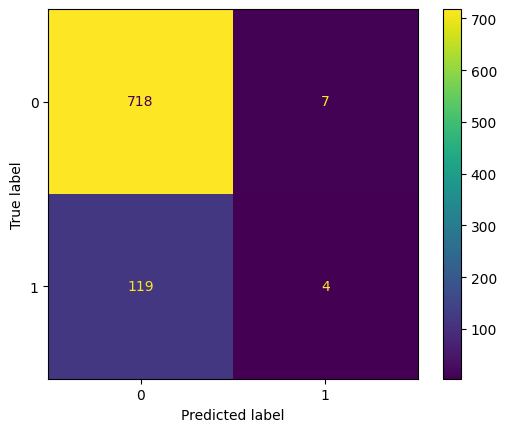

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cf=ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
cf